In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import skimage.io
from glob import glob

In [2]:
data_folder="./data"
image_paths = glob(os.path.join(data_folder, 'CameraRGB', '*.png'))
label_paths = glob(os.path.join(data_folder, 'CameraSeg', '*.png'))

images = []
gt_images = []

In [3]:
num_classes=13
label_agg=np.zeros((len(label_paths),num_classes))

car_hood=np.load("hood_mask.npy")
for i in range(len(label_paths)):
    label_file=label_paths[i]
    img_array=skimage.io.imread(label_file)
    img_label=img_array[:,:,0]
    img_label=img_label*car_hood
    for nk in range(num_classes):
        class_label=(img_label==nk)
        label_agg[i,nk]=np.sum(class_label)

(array([158., 161., 115.,  52.,  34.,  79.,  53.,  33.,  19.,  25.,  23.,
         20.,  18.,  10.,  10.,  12.,   7.,  11.,   4.,   9.,   7.,   9.,
          5.,  10.,   8.,   4.,  64.,   1.,   4.,   2.,   3.,   6.,   6.,
          2.,   2.,   4.,   1.,   2.,   0.,   2.,   1.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   2.]),
 array([    0.  ,   828.56,  1657.12,  2485.68,  3314.24,  4142.8 ,
         4971.36,  5799.92,  6628.48,  7457.04,  8285.6 ,  9114.16,
         9942.72, 10771.28, 11599.84, 12428.4 , 13256.96, 14085.52,
        14914.08, 15742.64, 16571.2 , 17399.76, 18228.32, 19056.88,
        19885.44, 20714.  , 21542.56, 22371.12, 23199.68, 24028.24,
        24856.8 , 25685.36, 26513.92, 27342.48, 28171.04, 28999.6 ,
        29828.16, 30656.72, 31485.28, 32313.84, 33142.4 , 33970.96,
        34799.52, 35628.08, 36456.64, 37285.2 , 38113.76, 38942.32,
        39770.88, 40599.44, 41428.  ]),
 <a list of 50 Patch objects>)

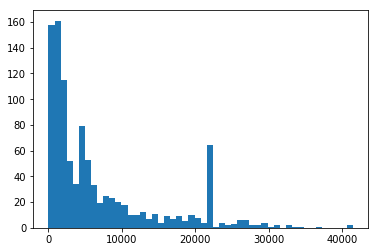

In [4]:
plt.hist(label_agg[:,10],bins=50)

(array([ 1.,  3.,  1.,  4.,  3.,  3.,  4.,  0.,  3.,  2.,  5.,  3.,  3.,
         3.,  2.,  7.,  7., 64., 20., 23., 43., 49., 57., 74., 73., 64.,
        73., 55., 47., 46., 47., 42., 32., 24., 18., 10.,  8.,  9., 10.,
         8.,  2.,  6.,  9.,  3.,  6.,  3.,  7.,  5.,  6.,  3.]),
 array([ 50437.  ,  52040.28,  53643.56,  55246.84,  56850.12,  58453.4 ,
         60056.68,  61659.96,  63263.24,  64866.52,  66469.8 ,  68073.08,
         69676.36,  71279.64,  72882.92,  74486.2 ,  76089.48,  77692.76,
         79296.04,  80899.32,  82502.6 ,  84105.88,  85709.16,  87312.44,
         88915.72,  90519.  ,  92122.28,  93725.56,  95328.84,  96932.12,
         98535.4 , 100138.68, 101741.96, 103345.24, 104948.52, 106551.8 ,
        108155.08, 109758.36, 111361.64, 112964.92, 114568.2 , 116171.48,
        117774.76, 119378.04, 120981.32, 122584.6 , 124187.88, 125791.16,
        127394.44, 128997.72, 130601.  ]),
 <a list of 50 Patch objects>)

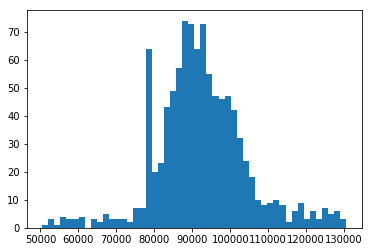

In [5]:
plt.hist(label_agg[:,7],bins=50)

In [6]:
car_road_ratio=label_agg[:,10]/label_agg[:,7]

(array([200., 190.,  86.,  62.,  91.,  51.,  42.,  25.,  27.,  20.,  14.,
          9.,  11.,  11.,   9.,  11.,   9.,   2.,   8.,   9.,   4.,   5.,
          7.,   6.,  61.,   5.,   3.,   3.,   1.,   4.,   5.,   2.,   2.,
          1.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([0.        , 0.01135918, 0.02271836, 0.03407754, 0.04543672,
        0.05679591, 0.06815509, 0.07951427, 0.09087345, 0.10223263,
        0.11359181, 0.12495099, 0.13631017, 0.14766935, 0.15902853,
        0.17038772, 0.1817469 , 0.19310608, 0.20446526, 0.21582444,
        0.22718362, 0.2385428 , 0.24990198, 0.26126116, 0.27262035,
        0.28397953, 0.29533871, 0.30669789, 0.31805707, 0.32941625,
        0.34077543, 0.35213461, 0.36349379, 0.37485298, 0.38621216,
        0.39757134, 0.40893052, 0.4202897 , 0.43164888, 0.44300806,
        0.45436724]),
 <a list of 40 Patch objects>)

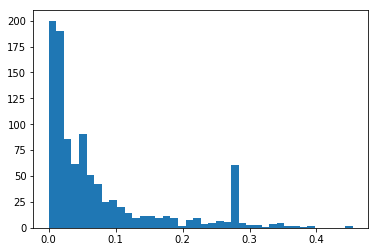

In [7]:
plt.hist(car_road_ratio,bins=40)

In [8]:
num_classes=13
select_prob=0.5

car_hood=np.load("hood_mask.npy")
selected_image_bin=[]
for i in range(len(label_paths)):
    label_file=label_paths[i]
    img_array=skimage.io.imread(label_file)
    img_label=img_array[:,:,0]
    img_label=img_label*car_hood
    
    car_count=np.sum((img_label==10))
    if car_count<5000:
        if np.random.rand()>select_prob:
            selected_image_bin.append(img_label)
    else:
        selected_image_bin.append(img_label)
    

(array([76., 84., 58., 25., 15., 43., 53., 33., 19., 25., 23., 20., 18.,
        10., 10., 12.,  7., 11.,  4.,  9.,  7.,  9.,  5., 10.,  8.,  4.,
        64.,  1.,  4.,  2.,  3.,  6.,  6.,  2.,  2.,  4.,  1.,  2.,  0.,
         2.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.]),
 array([    0.  ,   828.56,  1657.12,  2485.68,  3314.24,  4142.8 ,
         4971.36,  5799.92,  6628.48,  7457.04,  8285.6 ,  9114.16,
         9942.72, 10771.28, 11599.84, 12428.4 , 13256.96, 14085.52,
        14914.08, 15742.64, 16571.2 , 17399.76, 18228.32, 19056.88,
        19885.44, 20714.  , 21542.56, 22371.12, 23199.68, 24028.24,
        24856.8 , 25685.36, 26513.92, 27342.48, 28171.04, 28999.6 ,
        29828.16, 30656.72, 31485.28, 32313.84, 33142.4 , 33970.96,
        34799.52, 35628.08, 36456.64, 37285.2 , 38113.76, 38942.32,
        39770.88, 40599.44, 41428.  ]),
 <a list of 50 Patch objects>)

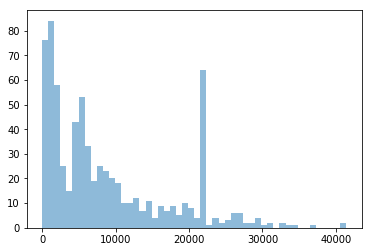

In [9]:
car_count=[]
for simg in selected_image_bin:
    
    car_count.append(np.sum(simg==10))

plt.hist(car_count,bins=50,alpha=0.5)
#plt.hist(label_agg[:,10],bins=50)

In [10]:
from simdata import ImageNpy
imgnpy=ImageNpy("./data/train_data.npy","./data/train_label.npy")

/Users/kanhua/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([1.13812540e-04, 6.37850499e-05, 1.62589343e-05, 7.37905479e-05,
        7.37905479e-05, 4.37740538e-05, 4.87768029e-05, 3.00164941e-05,
        2.25123705e-05, 2.37630578e-05, 1.50082470e-05, 1.50082470e-05,
        1.75096215e-05, 1.25068725e-05, 1.87603088e-05, 8.25453587e-05,
        5.00274901e-06, 6.25343626e-06, 7.50412352e-06, 1.12561853e-05,
        5.00274901e-06, 6.25343626e-06, 2.50137451e-06, 2.50137451e-06,
        2.50137451e-06, 0.00000000e+00, 1.25068725e-06, 0.00000000e+00,
        0.00000000e+00, 2.50137451e-06]),
 array([    0.        ,  1380.93333333,  2761.86666667,  4142.8       ,
         5523.73333333,  6904.66666667,  8285.6       ,  9666.53333333,
        11047.46666667, 12428.4       , 13809.33333333, 15190.26666667,
        16571.2       , 17952.13333333, 19333.06666667, 20714.        ,
        22094.93333333, 23475.86666667, 24856.8       , 26237.73333333,
        27618.66666667, 28999.6       , 30380.53333333, 31761.46666667,
        33142.4       

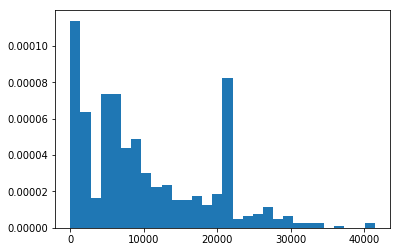

In [11]:
car_count_after_cut=[]
for img,lbl in imgnpy.get_bathes_fn_with_crop(50,None,shift_hue_prob=0,filter=True):
    for ll in lbl:
        car_count_after_cut.append(np.sum(ll[:,:,2]))
plt.hist(car_count_after_cut,bins=30,normed=True)
    

In [12]:
car_count_before_cut=[]
for img,lbl in imgnpy.get_bathes_fn_with_crop(50,None,shift_hue_prob=0,filter=False):
    for ll in lbl:
        car_count_before_cut.append(np.sum(ll[:,:,2]))


/Users/kanhua/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([1.13812540e-04, 6.37850499e-05, 1.62589343e-05, 7.37905479e-05,
        7.37905479e-05, 4.37740538e-05, 4.87768029e-05, 3.00164941e-05,
        2.25123705e-05, 2.37630578e-05, 1.50082470e-05, 1.50082470e-05,
        1.75096215e-05, 1.25068725e-05, 1.87603088e-05, 8.25453587e-05,
        5.00274901e-06, 6.25343626e-06, 7.50412352e-06, 1.12561853e-05,
        5.00274901e-06, 6.25343626e-06, 2.50137451e-06, 2.50137451e-06,
        2.50137451e-06, 0.00000000e+00, 1.25068725e-06, 0.00000000e+00,
        0.00000000e+00, 2.50137451e-06]),
 array([    0.        ,  1380.93333333,  2761.86666667,  4142.8       ,
         5523.73333333,  6904.66666667,  8285.6       ,  9666.53333333,
        11047.46666667, 12428.4       , 13809.33333333, 15190.26666667,
        16571.2       , 17952.13333333, 19333.06666667, 20714.        ,
        22094.93333333, 23475.86666667, 24856.8       , 26237.73333333,
        27618.66666667, 28999.6       , 30380.53333333, 31761.46666667,
        33142.4       

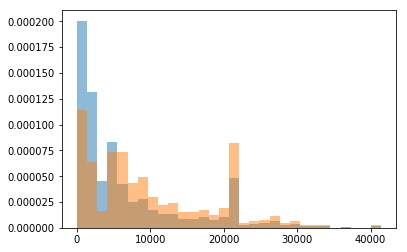

In [13]:
plt.hist(car_count_before_cut,bins=30,normed=True,alpha=0.5)
plt.hist(car_count_after_cut,bins=30,normed=True,alpha=0.5)

(array([91., 51., 13., 59., 59., 35., 39., 24., 18., 19., 12., 12., 14.,
        10., 15., 66.,  4.,  5.,  6.,  9.,  4.,  5.,  2.,  2.,  2.,  0.,
         1.,  0.,  0.,  2.]),
 array([    0.        ,  1380.93333333,  2761.86666667,  4142.8       ,
         5523.73333333,  6904.66666667,  8285.6       ,  9666.53333333,
        11047.46666667, 12428.4       , 13809.33333333, 15190.26666667,
        16571.2       , 17952.13333333, 19333.06666667, 20714.        ,
        22094.93333333, 23475.86666667, 24856.8       , 26237.73333333,
        27618.66666667, 28999.6       , 30380.53333333, 31761.46666667,
        33142.4       , 34523.33333333, 35904.26666667, 37285.2       ,
        38666.13333333, 40047.06666667, 41428.        ]),
 <a list of 30 Patch objects>)

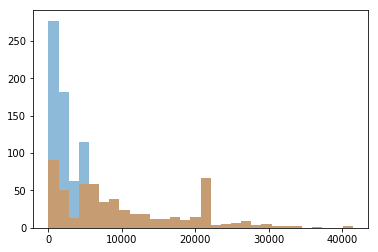

In [14]:
plt.hist(car_count_before_cut,bins=30,alpha=0.5)
plt.hist(car_count_after_cut,bins=30,alpha=0.5)